In [187]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sklearn as sk
from sklearn.decomposition import NMF, PCA
import os

import PlaceCellAnalysis as pc
import utilities as u
import preprocessing as pp
import behavior as b
# import BayesianDecoding as bd
import ensemble as nmf

os.sys.path.append("C:\\Users\\mplitt\\MightyMorphingPhotonRangers\\CensoredLstsq")
os.sys.path.append("")

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [234]:
df = pp.load_session_db()
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
mouse = '4222157.4'
df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')|
                   df_mouse['Track'].str.match('TwoTower_foraging')|df_mouse['Track'].str.match('FreqMorph_Timeout')]


G:\My Drive\VR_Data\TwoTower\behavior.sqlite
G:\My Drive\VR_Data\TwoTower\4222174.0\30_05_2019\RuningTraining_1.sqlite
file doesn't exist, errors to come!!!


In [235]:
df_mouse

,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,ImagingRegion,DateTime,data file,scanfile,scanmat,s2pfolder
2054,4222157.4,08_06_2019,2,FreqMorph_Timeout,52,1,CA1,2019-06-08,G:\My Drive\VR_Data\TwoTower\4222157.4\08_06_2...,None,G:\My Drive\2P_Data\TwoTower\4222157.4\08_06_2...,G:\My Drive\2P_Data\TwoTower\4222157.4\08_06_2...
2079,4222157.4,11_06_2019,1,FreqMorph_Timeout,71,1,CA1,2019-06-11,G:\My Drive\VR_Data\TwoTower\4222157.4\11_06_2...,None,G:\My Drive\2P_Data\TwoTower\4222157.4\11_06_2...,G:\My Drive\2P_Data\TwoTower\4222157.4\11_06_2...
2101,4222157.4,13_06_2019,1,FreqMorph_Timeout,76,1,CA1,2019-06-13,G:\My Drive\VR_Data\TwoTower\4222157.4\13_06_2...,None,G:\My Drive\2P_Data\TwoTower\4222157.4\13_06_2...,G:\My Drive\2P_Data\TwoTower\4222157.4\13_06_2...
2114,4222157.4,14_06_2019,2,FreqMorph_Timeout,66,1,CA1,2019-06-14,G:\My Drive\VR_Data\TwoTower\4222157.4\14_06_2...,None,G:\My Drive\2P_Data\TwoTower\4222157.4\14_06_2...,G:\My Drive\2P_Data\TwoTower\4222157.4\14_06_2...
2128,4222157.4,15_06_2019,1,FreqMorph_Timeout,70,1,CA1,2019-06-15,G:\My Drive\VR_Data\TwoTower\4222157.4\15_06_2...,None,G:\My Drive\2P_Data\TwoTower\4222157.4\15_06_2...,G:\My Drive\2P_Data\TwoTower\4222157.4\15_06_2...
2137,4222157.4,17_06_2019,1,FreqMorph_Timeout,78,1,CA1,2019-06-17,G:\My Drive\VR_Data\TwoTower\4222157.4\17_06_2...,None,G:\My Drive\2P_Data\TwoTower\4222157.4\17_06_2...,G:\My Drive\2P_Data\TwoTower\4222157.4\17_06_2...
2155,4222157.4,18_06_2019,1,FreqMorph_Timeout,87,1,CA1,2019-06-18,G:\My Drive\VR_Data\TwoTower\4222157.4\18_06_2...,None,G:\My Drive\2P_Data\TwoTower\4222157.4\18_06_2...,G:\My Drive\2P_Data\TwoTower\4222157.4\18_06_2...
2166,4222157.4,19_06_2019,1,FreqMorph_Timeout,85,1,CA1,2019-06-19,G:\My Drive\VR_Data\TwoTower\4222157.4\19_06_2...,None,G:\My Drive\2P_Data\TwoTower\4222157.4\19_06_2...,G:\My Drive\2P_Data\TwoTower\4222157.4\19_06_2...
2198,4222157.4,23_06_2019,1,TwoTower_Timeout,84,1,CA1,2019-06-23,G:\My Drive\VR_Data\TwoTower\4222157.4\23_06_2...,None,G:\My Drive\2P_Data\TwoTower\4222157.4\23_06_2...,G:\My Drive\2P_Data\TwoTower\4222157.4\23_06_2...
2212,4222157.4,25_06_2019,1,TwoTower_Timeout,104,1,CA1,2019-06-25,G:\My Drive\VR_Data\TwoTower\4222157.4\25_06_2...,None,G:\My Drive\2P_Data\TwoTower\4222157.4\25_06_2...,G:\My Drive\2P_Data\TwoTower\4222157.4\25_06_2...


In [236]:
sess = df_mouse.iloc[-3]

In [237]:
VRDat,C, S, A = pp.load_scan_sess(sess)
# Smean = np.mean(S,axis=0)
S /= 1564 #Smean[np.newaxis,:]

num aberrant ttls 0.0
22270 (22270,) (22270, 21) 63586


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


frame diff 0


In [242]:
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
S_trial_mat, occ, edges, centers = u.make_pos_bin_trial_matrices(S,VRDat.pos._values,tstart_inds,teleport_inds,bin_size=10)
S_trial_mat[np.isnan(S_trial_mat)]=0
S_flatmat = S_trial_mat.reshape([S_trial_mat.shape[0],-1])
effMorph = trial_info['morphs']+ trial_info['bckgndJitter']+trial_info['wallJitter']+trial_info['towerJitter']

C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:323: RuntimeWarning: Mean of empty slice
  zone0_speed[i]=np.nanmean(sub_frame.loc[zone0_mask,'speed'])
C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:324: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])


In [243]:
print(S_flatmat.shape,S_trial_mat.shape)

(100, 66240) (100, 45, 1472)


In [244]:
trialmask = np.zeros([S_flatmat.shape[0]])
inds = np.random.permutation(S_flatmat.shape[0])
print(inds)
trialmask[inds[:int(S_flatmat.shape[0]/2)]]=1
print(trialmask)
trialmask[:5]=0
trialmask = trialmask>0.



[44 15 40 97 22 17 51 67 54 75 57 56 82 99 77  6 55 73 38 31 87 29 88 89
 66 59 39 76 49  4 58 64 79 36 74 45 30 80 62 94 60 68 12  8 52 43 69 18
 41 24 25 46 47 71 72 90 48 81  2  1 91 84 32 33 27 98 14 61 92 10 86 16
 37 53 42  0  3 63 23 93 78 83  7 28 34 13 96  5 95 26  9 35 20 50 85 70
 11 65 21 19]
[0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 1.]


In [245]:
nmf_basic = NMF(n_components=2)
W = nmf_basic.fit_transform(S_flatmat[trialmask,:])

In [246]:
print(W.shape)

(49, 2)


In [247]:
H = nmf_basic.components_
print(H.shape)

(2, 66240)


In [248]:
What = np.matmul(S_flatmat[~trialmask,:],H.T)

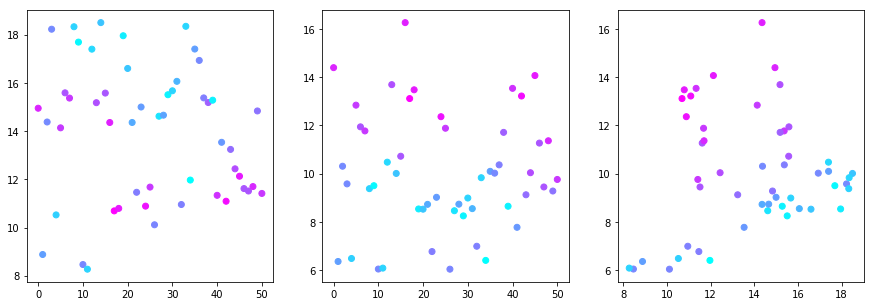

In [249]:
f,ax = plt.subplots(1,3,figsize=[15,5])
xarr = np.arange(What.shape[0])
ax[0].scatter(xarr,What[:,0],c=1-effMorph[~trialmask],cmap='cool')
ax[1].scatter(xarr,What[:,1],c=1-effMorph[~trialmask],cmap='cool')
ax[2].scatter(What[:,0],What[:,1],c=1-effMorph[~trialmask],cmap='cool')
# f.savefig('discreteeg.pdf',format='pdf')

In [135]:

results = nmf.fit_ensemble(S_flatmat,np.arange(1,10),n_replicates=5)

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:30<00:00, 15.48s/it]


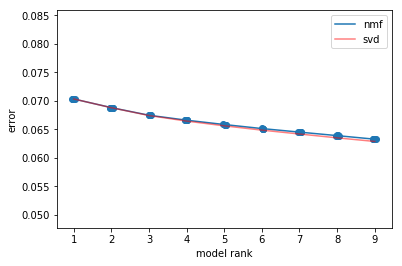

In [137]:
import plots 
ax = plots.plot_rmse(results)


In [138]:
print(results.keys())

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9])


In [143]:
W,H = results[2]['factors'][0][0], results[2]['factors'][0][1]

In [144]:
print(W.shape,H.shape)
print(S_flatmat.shape)

(80, 2) (2, 85545)
(80, 85545)


IndexError: index 2 is out of bounds for axis 1 with size 2

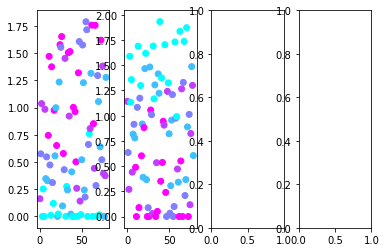

In [145]:
f,ax = plt.subplots(1,4)
xarr = np.arange(W.shape[0])
ax[0].scatter(xarr,W[:,0],c=trial_info['morphs'],cmap='cool')
ax[1].scatter(xarr,W[:,1],c=trial_info['morphs'],cmap='cool')
ax[2].scatter(xarr,W[:,2],c=trial_info['morphs'],cmap='cool')
ax[3].scatter(xarr,W[:,3],c=trial_info['morphs'],cmap='cool')

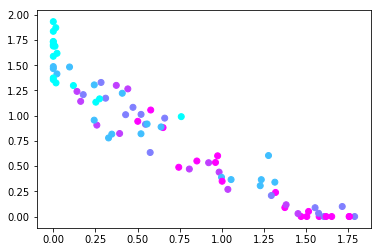

In [146]:
f,ax = plt.subplots()
ax.scatter(W[:,0],W[:,1],c=trial_info['morphs'],cmap='cool')

In [26]:
H_cells = H.reshape([2,S_trial_mat.shape[1],S_trial_mat.shape[2]])

In [27]:
print(H_cells.shape,S_trial_mat.shape)

(2, 45, 1631) (120, 45, 1631)


In [28]:
getSort = lambda fr : np.argsort(np.argmax(fr,axis=0),axis=0)


In [29]:
sort0,sort1 = getSort(H_cells[0,:,:]), getSort(H_cells[1,:,:])

In [30]:
print(sort0.shape)

(1631,)


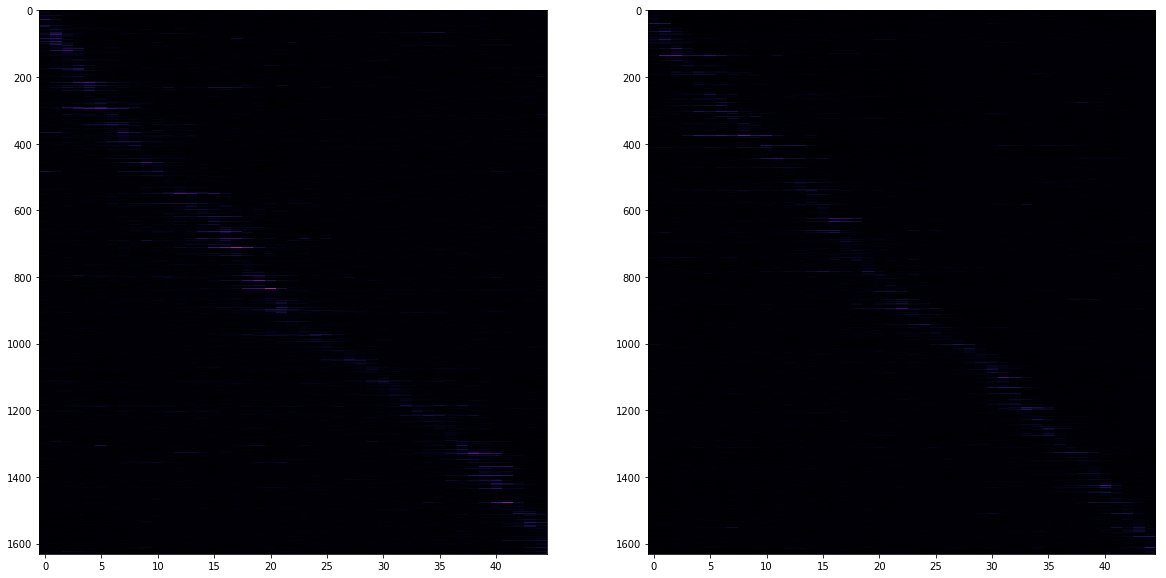

In [31]:
f,ax= plt.subplots(1,2,figsize=[20,10])
ax[0].imshow(H_cells[0,:,sort0],cmap='magma',aspect='auto',vmax=1)
ax[1].imshow(H_cells[1,:,sort1],cmap='magma',aspect='auto',vmax=1)

In [95]:
print(np.amin(H_cells),np.amax(H_cells))

0.0 4.9424092420746035


In [91]:
effMorph = trial_info['morphs']+ trial_info['bckgndJitter']+trial_info['wallJitter']
effMorph = (effMorph-np.amin(effMorph))/(np.amax(effMorph)-np.amin(effMorph)+.01)+.001

In [92]:
morph_edges = np.linspace(0,1,num=11)

In [95]:
m_dig=np.digitize(effMorph,morph_edges[1:])

In [96]:
print(m_dig)

[7 0 5 3 9 1 9 0 0 4 9 4 4 0 7 2 5 0 1 1 0 1 6 0 5 2 5 3 0 7 8 7 4 7 6 0 5
 9 3 3 2 7 6 8 5 6 2 9 0 1 7 3 0 9 9 4 5 0 9 8 4 0 9 3 0 0 9 3 8 1 7 9 3 9
 4 7 9 8 9 7 7 0 3 4 8 0 9 7 0 6 8 4 1 1 3 0 6 1 5 8 8 3 9 8 9 2 7 9 2 0 5
 3 5 3 2 9 8 4 6 0]


In [100]:
print([10].extend(list(S_trial_mat.shape[1:])))

None


In [110]:
a=list(S_trial_mat.shape)
a=a.extend([10])

In [111]:
print(a)

[120, 45, 1506, 10]


In [112]:
rm = u.morph_pos_rate_map(S_trial_mat,effMorph)

In [113]:
print(rm.shape)

(10, 45, 1506)
